<a href="https://colab.research.google.com/github/andzagz/sc-healthcare-trends/blob/main/cluster_ouvidoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# 📥 1. Import CSV file. It can be found at:
# https://dados.gov.br/dados/conjuntos-dados/demandas-dos-consumidores--reclamacoes-de-beneficiarios
import pandas as pd
import glob

# Define Path
base_path = '/content/drive/MyDrive/Colab Notebooks/Case beneficiarios/'
filename_template = 'PDA_Atualizacao_Demandas_dos_Consumidores_Reclamacao_de_Beneficiarios_{}.csv'

# Lista para armazenar os DataFrames
dataframes = []

# Loop através dos anos de 2021 a 2024
for year in range(2021, 2025):
    # Cria o caminho do arquivo para o ano atual
    file_path = base_path + filename_template.format(year)

    # Verifica se o arquivo existe
    if glob.glob(file_path):
        try:
            # Lê o arquivo CSV especificando o delimitador e tentando diferentes codificações
            df = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')
            dataframes.append(df)
        except UnicodeDecodeError:
            print(f"Erro de codificação ao ler o arquivo: {file_path}")
        except pd.errors.ParserError:
            print(f"Erro de parsing ao ler o arquivo: {file_path}")
    else:
        print(f"Arquivo não encontrado: {file_path}")

# Concatena todos os DataFrames em um só DataFrame
if dataframes:
    full_df = pd.concat(dataframes, ignore_index=True)
    # Exibe as primeiras linhas do DataFrame combinado
    print(full_df.head())
else:
    print("Nenhum arquivo foi lido com sucesso.")


   NUMERO_DEMANDA            DATA_ATENDIMENTO  \
0       5268753.0  23/07/2021 00:00:00.000000   
1       5282161.0  03/08/2021 00:00:00.000000   
2       5363084.0  30/09/2021 00:00:00.000000   
3       5094779.0  26/02/2021 00:00:00.000000   
4       5447065.0  02/12/2021 00:00:00.000000   

                                      STATUS_DEMANDA ENCAMINHADO_OUVIDORIA  \
0                                 Demanda Finalizada                   NÃO   
1  Resposta do Interlocutor à solução do Conflito...                   NÃO   
2                                       Arquivamento                   NÃO   
3           Prazo de Resposta do Consumidor expirado                   NÃO   
4  Resposta do Interlocutor à solução do Conflito...                   NÃO   

  MEIO_ATENDIMENTO                                            ASSUNTO  \
0             Site  Produto ou Plano >> Cobertura >> Regras para A...   
1         Telefone  Produto ou Plano >> Cobertura >> Regras para A...   
2         Telefon

In [66]:
df = full_df
df = df[df['UF_ATENDIMENTO_BENEFICIARIO'] == 'SC']
# Convert 'DATA_ATENDIMENTO' to datetime
df['DATA_ATENDIMENTO'] = pd.to_datetime(df['DATA_ATENDIMENTO'], format='%d/%m/%Y %H:%M:%S.%f', errors='coerce')
# Convert 'DT_NASC_BENEFICIARIO' to datetime, handling errors
df['DT_NASC_BENEFICIARIO'] = pd.to_datetime(df['DT_NASC_BENEFICIARIO'], format='%d/%m/%Y %H:%M:%S.%f', errors='coerce')
df.head()

<ipython-input-66-db8602be50c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATA_ATENDIMENTO'] = pd.to_datetime(df['DATA_ATENDIMENTO'], format='%d/%m/%Y %H:%M:%S.%f', errors='coerce')
<ipython-input-66-db8602be50c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DT_NASC_BENEFICIARIO'] = pd.to_datetime(df['DT_NASC_BENEFICIARIO'], format='%d/%m/%Y %H:%M:%S.%f', errors='coerce')


,NUMERO_DEMANDA,DATA_ATENDIMENTO,STATUS_DEMANDA,ENCAMINHADO_OUVIDORIA,MEIO_ATENDIMENTO,ASSUNTO,REGISTRO_ANS,NOME_OPERADORA,MODALIDADE_OPERADORA,TIPO_PLANO_CONTRATADO,EPOCA_CONTRATACAO_PLANO,COBERTURAS_CONTRATADAS,DT_NASC_BENEFICIARIO,SEXO,UF_BENEFICIARIO,CD_MUN_BENEFICIARIO,NOME_PROCEDIMENTO,UF_ATENDIMENTO_BENEFICIARIO,NUMERO_PROCESSO
20,5345665.0,2021-09-20,Prazo de Resposta do Consumidor expirado,NÃO,Site,Produto ou Plano >> Cobertura >> Prazos Máximo...,393321.0,UNIMED-RIO COOPERATIVA DE TRABALHO MEDICO DO R...,Cooperativa Médica,Individual ou Familiar,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,2018-01-16,F,SC,330455.0,NaN,SC,NaN
100,5065635.0,2021-01-26,Prazo de Resposta do Consumidor expirado,NÃO,Site,Produto ou Plano >> Cobertura >> Prazos Máximo...,360449.0,UNIMED GRANDE FLORIANÓPOLIS-COOPERATIVA DE TRA...,Cooperativa Médica,Coletivo por Adesão,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,1951-02-24,M,SC,420540.0,NaN,SC,NaN
160,5349055.0,2021-09-21,Demanda Finalizada,NÃO,Telefone,Produto ou Plano >> Cobertura >> Prazos Máximo...,701.0,UNIMED SEGUROS SAÚDE S/A,Seguradora Especializada em Saúde,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,2018-01-24,M,SC,355030.0,CONSULTA/SESSÃO COM FONOAUDIÓLOGO (COM DIRETRI...,SC,NaN
214,5341169.0,2021-09-15,Processo Encaminhado para Cobrança,NÃO,Telefone,Produto ou Plano >> Cobertura >> Regras para A...,368253.0,HAPVIDA ASSISTENCIA MEDICA S.A.,Medicina de Grupo,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,1989-09-02,F,SC,230440.0,MASTECTOMIA,SC,33910.036510/2021-44
245,5311675.0,2021-08-24,Prazo de Resposta do Consumidor expirado,NÃO,Telefone,Produto ou Plano >> Cobertura >> Regras para A...,339679.0,UNIMED NACIONAL - COOPERATIVA CENTRAL,Cooperativa Médica,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,2000-06-19,F,SC,355030.0,NaN,SC,NaN


In [67]:
today = pd.to_datetime('today')

# Calculate age considering leap years
df['IDADE'] = today.year - df['DT_NASC_BENEFICIARIO'].dt.year - (
    (today.month < df['DT_NASC_BENEFICIARIO'].dt.month) |
    ((today.month == df['DT_NASC_BENEFICIARIO'].dt.month) & (today.day < df['DT_NASC_BENEFICIARIO'].dt.day))
).astype(int)

# Function to categorize age groups according to WHO
def faixa_etaria(idade):
    if idade <=18:
      return 'Jovem'
    elif idade <=59:
      return 'Adulto'
    else:
      return 'Idoso'

df['IDADE'] = df['IDADE'].apply(faixa_etaria)
df.head(5)

<ipython-input-67-be001fb1e927>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IDADE'] = today.year - df['DT_NASC_BENEFICIARIO'].dt.year - (
<ipython-input-67-be001fb1e927>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IDADE'] = df['IDADE'].apply(faixa_etaria)


,NUMERO_DEMANDA,DATA_ATENDIMENTO,STATUS_DEMANDA,ENCAMINHADO_OUVIDORIA,MEIO_ATENDIMENTO,ASSUNTO,REGISTRO_ANS,NOME_OPERADORA,MODALIDADE_OPERADORA,TIPO_PLANO_CONTRATADO,EPOCA_CONTRATACAO_PLANO,COBERTURAS_CONTRATADAS,DT_NASC_BENEFICIARIO,SEXO,UF_BENEFICIARIO,CD_MUN_BENEFICIARIO,NOME_PROCEDIMENTO,UF_ATENDIMENTO_BENEFICIARIO,NUMERO_PROCESSO,IDADE
20,5345665.0,2021-09-20,Prazo de Resposta do Consumidor expirado,NÃO,Site,Produto ou Plano >> Cobertura >> Prazos Máximo...,393321.0,UNIMED-RIO COOPERATIVA DE TRABALHO MEDICO DO R...,Cooperativa Médica,Individual ou Familiar,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,2018-01-16,F,SC,330455.0,NaN,SC,NaN,Jovem
100,5065635.0,2021-01-26,Prazo de Resposta do Consumidor expirado,NÃO,Site,Produto ou Plano >> Cobertura >> Prazos Máximo...,360449.0,UNIMED GRANDE FLORIANÓPOLIS-COOPERATIVA DE TRA...,Cooperativa Médica,Coletivo por Adesão,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,1951-02-24,M,SC,420540.0,NaN,SC,NaN,Idoso
160,5349055.0,2021-09-21,Demanda Finalizada,NÃO,Telefone,Produto ou Plano >> Cobertura >> Prazos Máximo...,701.0,UNIMED SEGUROS SAÚDE S/A,Seguradora Especializada em Saúde,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,2018-01-24,M,SC,355030.0,CONSULTA/SESSÃO COM FONOAUDIÓLOGO (COM DIRETRI...,SC,NaN,Jovem
214,5341169.0,2021-09-15,Processo Encaminhado para Cobrança,NÃO,Telefone,Produto ou Plano >> Cobertura >> Regras para A...,368253.0,HAPVIDA ASSISTENCIA MEDICA S.A.,Medicina de Grupo,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,1989-09-02,F,SC,230440.0,MASTECTOMIA,SC,33910.036510/2021-44,Adulto
245,5311675.0,2021-08-24,Prazo de Resposta do Consumidor expirado,NÃO,Telefone,Produto ou Plano >> Cobertura >> Regras para A...,339679.0,UNIMED NACIONAL - COOPERATIVA CENTRAL,Cooperativa Médica,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,2000-06-19,F,SC,355030.0,NaN,SC,NaN,Adulto


In [68]:
# Select columns that may contribute for analysis
df = df.drop(columns=['NUMERO_DEMANDA', 'DT_NASC_BENEFICIARIO', 'REGISTRO_ANS',
                      'UF_BENEFICIARIO', 'CD_MUN_BENEFICIARIO', 'NUMERO_PROCESSO',
                      'UF_ATENDIMENTO_BENEFICIARIO'])
df.head(5)

,DATA_ATENDIMENTO,STATUS_DEMANDA,ENCAMINHADO_OUVIDORIA,MEIO_ATENDIMENTO,ASSUNTO,NOME_OPERADORA,MODALIDADE_OPERADORA,TIPO_PLANO_CONTRATADO,EPOCA_CONTRATACAO_PLANO,COBERTURAS_CONTRATADAS,SEXO,NOME_PROCEDIMENTO,IDADE
20,2021-09-20,Prazo de Resposta do Consumidor expirado,NÃO,Site,Produto ou Plano >> Cobertura >> Prazos Máximo...,UNIMED-RIO COOPERATIVA DE TRABALHO MEDICO DO R...,Cooperativa Médica,Individual ou Familiar,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,F,NaN,Jovem
100,2021-01-26,Prazo de Resposta do Consumidor expirado,NÃO,Site,Produto ou Plano >> Cobertura >> Prazos Máximo...,UNIMED GRANDE FLORIANÓPOLIS-COOPERATIVA DE TRA...,Cooperativa Médica,Coletivo por Adesão,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,M,NaN,Idoso
160,2021-09-21,Demanda Finalizada,NÃO,Telefone,Produto ou Plano >> Cobertura >> Prazos Máximo...,UNIMED SEGUROS SAÚDE S/A,Seguradora Especializada em Saúde,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,M,CONSULTA/SESSÃO COM FONOAUDIÓLOGO (COM DIRETRI...,Jovem
214,2021-09-15,Processo Encaminhado para Cobrança,NÃO,Telefone,Produto ou Plano >> Cobertura >> Regras para A...,HAPVIDA ASSISTENCIA MEDICA S.A.,Medicina de Grupo,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,F,MASTECTOMIA,Adulto
245,2021-08-24,Prazo de Resposta do Consumidor expirado,NÃO,Telefone,Produto ou Plano >> Cobertura >> Regras para A...,UNIMED NACIONAL - COOPERATIVA CENTRAL,Cooperativa Médica,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,F,NaN,Adulto


In [69]:
# Descriptive Analysis
df.describe(include='all')

,DATA_ATENDIMENTO,STATUS_DEMANDA,ENCAMINHADO_OUVIDORIA,MEIO_ATENDIMENTO,ASSUNTO,NOME_OPERADORA,MODALIDADE_OPERADORA,TIPO_PLANO_CONTRATADO,EPOCA_CONTRATACAO_PLANO,COBERTURAS_CONTRATADAS,SEXO,NOME_PROCEDIMENTO,IDADE
count,15339,15339,15339,15339,15339,15339,15339,15133,15339,15133,15306,2615,15339
unique,NaN,33,1,11,23,243,9,3,3,11,2,611,3
top,NaN,Prazo de Resposta do Consumidor expirado,NÃO,Site,Produto ou Plano >> Cobertura >> Regras para A...,UNIMED GRANDE FLORIANÓPOLIS-COOPERATIVA DE TRA...,Cooperativa Médica,Coletivo Empresarial,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,F,CONSULTA MÉDICA,Adulto
freq,NaN,7520,15339,7866,5235,2587,7119,8264,8178,11726,8728,281,9305
mean,2023-02-08 01:10:35.791120640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023-11-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# The column ENCAMINHADO_OUVIDORIA contains only one type of category, which does not contribute to the analysis.

df = df.drop(columns=['ENCAMINHADO_OUVIDORIA'])
df.describe(include ='all')

,DATA_ATENDIMENTO,STATUS_DEMANDA,MEIO_ATENDIMENTO,ASSUNTO,NOME_OPERADORA,MODALIDADE_OPERADORA,TIPO_PLANO_CONTRATADO,EPOCA_CONTRATACAO_PLANO,COBERTURAS_CONTRATADAS,SEXO,NOME_PROCEDIMENTO,IDADE
count,15339,15339,15339,15339,15339,15339,15133,15339,15133,15306,2615,15339
unique,NaN,33,11,23,243,9,3,3,11,2,611,3
top,NaN,Prazo de Resposta do Consumidor expirado,Site,Produto ou Plano >> Cobertura >> Regras para A...,UNIMED GRANDE FLORIANÓPOLIS-COOPERATIVA DE TRA...,Cooperativa Médica,Coletivo Empresarial,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,F,CONSULTA MÉDICA,Adulto
freq,NaN,7520,7866,5235,2587,7119,8264,8178,11726,8728,281,9305
mean,2023-02-08 01:10:35.791120640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023-11-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df['NOME_PROCEDIMENTO'].unique()
# The values in the 'NOME_PROCEDIMENTO' column have many loosely related
# categories, which makes grouping difficult and does not significantly
# contribute to the training of clusters. Therefore, it will not be considered
# in the model.

array([nan,
       'CONSULTA/SESSÃO COM FONOAUDIÓLOGO (COM DIRETRIZ DE UTILIZAÇÃO)',
       'MASTECTOMIA', 'BIÓPSIA DE BOCA (COM DIRETRIZ DE UTILIZAÇÃO)',
       'MAPEAMENTO DE FEIXES ANÔMALOS E FOCOS ECTÓPICOS POR ELETROFISIOLOGIA INTRACAVITÁRIA, COM PROVAS',
       'HEMOGLOBINA, DOSAGEM',
       'OSTEOTOMIAS AO NÍVEL DO JOELHO - TRATAMENTO CIRÚRGICO',
       'ANGIOPLASTIA TRANSLUMINAL PERCUTÂNEA DE MÚLTIPLOS VASOS OU DE BIFURCAÇÃO COM IMPLANTE DE STENT',
       'CONSULTA com PSIQUIATRA', 'AMIGDALECTOMIA DAS PALATINAS',
       'CONSULTA MÉDICA', 'INEXISTENTE',
       ' - - PROCEDIMENTO NÃO LOCALIZADO - - ',
       'TOMOGRAFIA COMPUTADORIZADA DE TÓRAX',
       'HERNIORRAFIA RECIDIVANTE POR VIDEOLAPAROSCOPIA',
       'HÉRNIA DE DISCO - TRATAMENTO CIRÚRGICO', 'IGE POR ALÉRGENO',
       'QUIMIOTERAPIA SISTÊMICA',
       'CONSULTA COM FISIOTERAPEUTA (COM DIRETRIZ DE UTILIZAÇÃO)',
       'COLESTEROL TOTAL',
       'CONSULTA/SESSÃO COM PSICÓLOGO E/OU TERAPEUTA OCUPACIONAL (COM DIRETRIZ DE UT

In [72]:
# Including 'ANO' Column
df['ANO'] = df['DATA_ATENDIMENTO'].dt.year
df.head(2)

,DATA_ATENDIMENTO,STATUS_DEMANDA,MEIO_ATENDIMENTO,ASSUNTO,NOME_OPERADORA,MODALIDADE_OPERADORA,TIPO_PLANO_CONTRATADO,EPOCA_CONTRATACAO_PLANO,COBERTURAS_CONTRATADAS,SEXO,NOME_PROCEDIMENTO,IDADE,ANO
20,2021-09-20,Prazo de Resposta do Consumidor expirado,Site,Produto ou Plano >> Cobertura >> Prazos Máximo...,UNIMED-RIO COOPERATIVA DE TRABALHO MEDICO DO R...,Cooperativa Médica,Individual ou Familiar,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,F,NaN,Jovem,2021
100,2021-01-26,Prazo de Resposta do Consumidor expirado,Site,Produto ou Plano >> Cobertura >> Prazos Máximo...,UNIMED GRANDE FLORIANÓPOLIS-COOPERATIVA DE TRA...,Cooperativa Médica,Coletivo por Adesão,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,M,NaN,Idoso,2021


In [73]:
# Missing values rate
df.isna().mean() * 100

,0
DATA_ATENDIMENTO,0.000000
STATUS_DEMANDA,0.000000
MEIO_ATENDIMENTO,0.000000
ASSUNTO,0.000000
NOME_OPERADORA,0.000000
MODALIDADE_OPERADORA,0.000000
TIPO_PLANO_CONTRATADO,1.342982
EPOCA_CONTRATACAO_PLANO,0.000000
COBERTURAS_CONTRATADAS,1.342982
SEXO,0.215138


In [74]:
# Disregard the column with missing values in almost all rows of the dataset
df = df.drop(columns=['NOME_PROCEDIMENTO'])

# Fill in the missing values with the mode, the most frequent value among the
# categories, since there are only a few missing data points
df.fillna(df.mode().iloc[0], inplace=True)
df.isna().mean() * 100

,0
DATA_ATENDIMENTO,0.0
STATUS_DEMANDA,0.0
MEIO_ATENDIMENTO,0.0
ASSUNTO,0.0
NOME_OPERADORA,0.0
MODALIDADE_OPERADORA,0.0
TIPO_PLANO_CONTRATADO,0.0
EPOCA_CONTRATACAO_PLANO,0.0
COBERTURAS_CONTRATADAS,0.0
SEXO,0.0


In [75]:
!pip install kmodes


In [76]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Columns selection for treining model
columns_for_clustering = [
'STATUS_DEMANDA',	'MEIO_ATENDIMENTO',	'ASSUNTO',	'NOME_OPERADORA',	'MODALIDADE_OPERADORA',
'TIPO_PLANO_CONTRATADO',	'COBERTURAS_CONTRATADAS',
'SEXO',	'IDADE',	'ANO']

# DataFrame
df_clustering = df[columns_for_clustering]

# List to store inertia values
costs = []

# Inertia for cluster groups from 1 to 15, random_state defined as 42 and n_init 5
for n_clusters in range(1, 15):
    kmodes = KModes(n_clusters=n_clusters, init='Cao', n_init=5, verbose=0, random_state=42)
    clusters = kmodes.fit_predict(df_clustering)
    costs.append(kmodes.cost_)




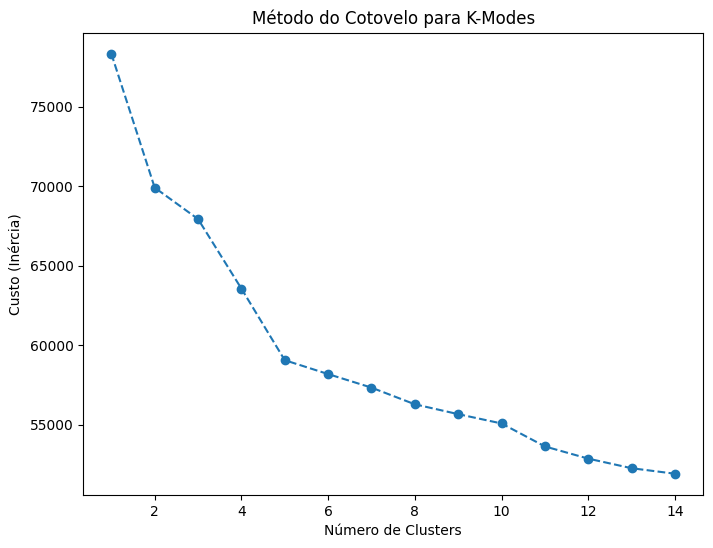

In [77]:
# 📊 Elbow Method Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), costs, marker='o', linestyle='--')
plt.title('Elbow Method for K-Modes')
plt.xlabel('Cluster Nº')
plt.ylabel('Cost (inertia)')
plt.show()

In [78]:
!pip install scikit-learn-extra


In [79]:
# Identify features Dtype
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15339 entries, 20 to 1032295
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   STATUS_DEMANDA          15339 non-null  object
 1   MEIO_ATENDIMENTO        15339 non-null  object
 2   ASSUNTO                 15339 non-null  object
 3   NOME_OPERADORA          15339 non-null  object
 4   MODALIDADE_OPERADORA    15339 non-null  object
 5   TIPO_PLANO_CONTRATADO   15339 non-null  object
 6   COBERTURAS_CONTRATADAS  15339 non-null  object
 7   SEXO                    15339 non-null  object
 8   IDADE                   15339 non-null  object
 9   ANO                     15339 non-null  int32 
dtypes: int32(1), object(9)
memory usage: 1.2+ MB


In [80]:
# Convert features to 'category'
for col in df_clustering.select_dtypes(include=['object']).columns:
    df_clustering[col] = df_clustering[col].astype('category')


df_clustering['ANO'] = df_clustering['ANO'].astype(str).astype('category')
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15339 entries, 20 to 1032295
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   STATUS_DEMANDA          15339 non-null  category
 1   MEIO_ATENDIMENTO        15339 non-null  category
 2   ASSUNTO                 15339 non-null  category
 3   NOME_OPERADORA          15339 non-null  category
 4   MODALIDADE_OPERADORA    15339 non-null  category
 5   TIPO_PLANO_CONTRATADO   15339 non-null  category
 6   COBERTURAS_CONTRATADAS  15339 non-null  category
 7   SEXO                    15339 non-null  category
 8   IDADE                   15339 non-null  category
 9   ANO                     15339 non-null  category
dtypes: category(10)
memory usage: 298.3 KB


<ipython-input-80-3d6890db16fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering[col] = df_clustering[col].astype('category')
<ipython-input-80-3d6890db16fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering[col] = df_clustering[col].astype('category')
<ipython-input-80-3d6890db16fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

# Store Silhouette values
silhouette_scores = []

# Loop for testing clusters from 2 to 15 groups
for k in range(2, 16):
    km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0, random_state=42)
    clusters = km.fit_predict(df_clustering)

    # Label Enconding
    df_clustering_numeric = df_clustering.apply(lambda x: pd.factorize(x)[0])

    # Hamming distance matrix
    hamming_dist_matrix = squareform(pdist(df_clustering_numeric, metric='hamming'))

    # Silhouette
    silhouette_avg = silhouette_score(hamming_dist_matrix, clusters, metric='precomputed')
    silhouette_scores.append(silhouette_avg)

    print(f'K={k}, Índice de Silhueta: {silhouette_avg:.4f}')

K=2, Índice de Silhueta: 0.0894
K=3, Índice de Silhueta: 0.0709
K=4, Índice de Silhueta: 0.0653
K=5, Índice de Silhueta: 0.0940
K=6, Índice de Silhueta: 0.0796
K=7, Índice de Silhueta: 0.0641
K=8, Índice de Silhueta: 0.0690
K=9, Índice de Silhueta: 0.0627
K=10, Índice de Silhueta: 0.0408
K=11, Índice de Silhueta: 0.0489
K=12, Índice de Silhueta: 0.0506
K=13, Índice de Silhueta: 0.0531
K=14, Índice de Silhueta: 0.0549
K=15, Índice de Silhueta: 0.0541


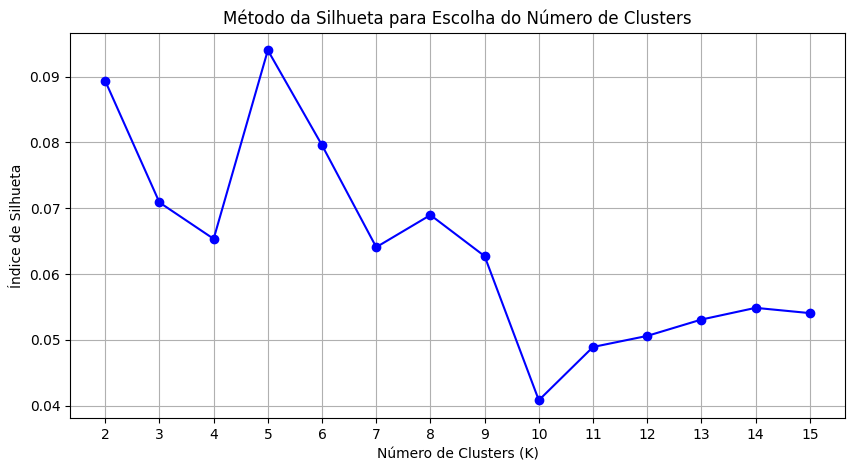

In [82]:
# 📊 Silhouette Analysis Plot
plt.figure(figsize=(10, 5))
plt.plot(range(2, 16), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Cluster Nº')
plt.ylabel('Silhouette')
plt.title('Silhouette Analysis Plot')
plt.xticks(range(2, 16))
plt.grid(True)
plt.show()


In [85]:
# Cluster numbers defined as 5 groups
n_clusters = 5

# Kmodes train model
kmodes = KModes(n_clusters=n_clusters, init='Cao', n_init=5, verbose=0, random_state=42)
clusters = kmodes.fit_predict(df_clustering)

# Add CLUSTER column
df['CLUSTER'] = clusters

# Print
print(df.head())

    DATA_ATENDIMENTO                            STATUS_DEMANDA  \
20        2021-09-20  Prazo de Resposta do Consumidor expirado   
100       2021-01-26  Prazo de Resposta do Consumidor expirado   
160       2021-09-21                        Demanda Finalizada   
214       2021-09-15        Processo Encaminhado para Cobrança   
245       2021-08-24  Prazo de Resposta do Consumidor expirado   

    MEIO_ATENDIMENTO                                            ASSUNTO  \
20              Site  Produto ou Plano >> Cobertura >> Prazos Máximo...   
100             Site  Produto ou Plano >> Cobertura >> Prazos Máximo...   
160         Telefone  Produto ou Plano >> Cobertura >> Prazos Máximo...   
214         Telefone  Produto ou Plano >> Cobertura >> Regras para A...   
245         Telefone  Produto ou Plano >> Cobertura >> Regras para A...   

                                        NOME_OPERADORA  \
20   UNIMED-RIO COOPERATIVA DE TRABALHO MEDICO DO R...   
100  UNIMED GRANDE FLORIANÓPOLIS-COO

In [86]:
# Path
caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/Case beneficiarios/df_clusterizado.csv'

# Save processed file
df.to_csv(caminho_arquivo, index=False)

print(f"DataFrame in path: {caminho_arquivo}")


DataFrame exportado com sucesso para /content/drive/MyDrive/Colab Notebooks/Case beneficiarios/df_clusterizado.csv


Importar arquivo

In [1]:
# 📥 1. Import CSV
import pandas as pd

# Path
caminho_arquivo = "/content/drive/MyDrive/Colab Notebooks/Case beneficiarios/df_clusterizado.csv"

# Define DF
df = pd.read_csv(caminho_arquivo)

# head
df.head(2)


,DATA_ATENDIMENTO,STATUS_DEMANDA,MEIO_ATENDIMENTO,ASSUNTO,NOME_OPERADORA,MODALIDADE_OPERADORA,TIPO_PLANO_CONTRATADO,EPOCA_CONTRATACAO_PLANO,COBERTURAS_CONTRATADAS,SEXO,IDADE,ANO,CLUSTER
0,2021-09-20,Prazo de Resposta do Consumidor expirado,Site,Produto ou Plano >> Cobertura >> Prazos Máximo...,UNIMED-RIO COOPERATIVA DE TRABALHO MEDICO DO R...,Cooperativa Médica,Individual ou Familiar,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,F,Jovem,2021,4
1,2021-01-26,Prazo de Resposta do Consumidor expirado,Site,Produto ou Plano >> Cobertura >> Prazos Máximo...,UNIMED GRANDE FLORIANÓPOLIS-COOPERATIVA DE TRA...,Cooperativa Médica,Coletivo por Adesão,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,M,Idoso,2021,0


In [5]:
# 📊 2. Create the Table with Predominant Attributes

# Count the number of observations per cluster
cluster_sizes = df["CLUSTER"].value_counts().rename("Cluster_Size")

# Group data per cluster and calculate mode
tabela_predominante = df.groupby("CLUSTER").agg(lambda x: x.mode().iloc[0])

# Rename columns
tabela_predominante.columns = [f"Predominante_{col}" for col in tabela_predominante.columns]

# Add cluster size
tabela_predominante.insert(0, "Cluster_Size", cluster_sizes)

tabela_predominante


,Cluster_Size,Predominante_DATA_ATENDIMENTO,Predominante_STATUS_DEMANDA,Predominante_MEIO_ATENDIMENTO,Predominante_ASSUNTO,Predominante_NOME_OPERADORA,Predominante_MODALIDADE_OPERADORA,Predominante_TIPO_PLANO_CONTRATADO,Predominante_EPOCA_CONTRATACAO_PLANO,Predominante_COBERTURAS_CONTRATADAS,Predominante_SEXO,Predominante_IDADE,Predominante_ANO
CLUSTER,,,,,,,,,,,,,
0,6167,2023-11-22,Prazo de Resposta do Consumidor expirado,Site,Produto ou Plano >> Cobertura >> Regras para A...,UNIMED GRANDE FLORIANÓPOLIS-COOPERATIVA DE TRA...,Cooperativa Médica,Coletivo Empresarial,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,F,Adulto,2023
1,2377,2023-08-01,Resposta do Interlocutor à solução do Conflito...,Site,Produto ou Plano >> Cobertura >> Rede de Atend...,CLINIPAM CLINICA PARANAENSE DE ASSISTENCIA MED...,Medicina de Grupo,Individual ou Familiar,-,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,M,Adulto,2022
2,1922,2024-01-10,Prazo de Resposta do Consumidor expirado,Telefone,Produto ou Plano >> Cobertura >> Reembolso,BRADESCO SAÚDE S.A.,Seguradora Especializada em Saúde,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,M,Jovem,2024
3,3015,2023-08-01,Prazo de Resposta do Consumidor expirado,Telefone,Produto ou Plano >> Cobertura >> Regras para A...,CLINIPAM CLINICA PARANAENSE DE ASSISTENCIA MED...,Medicina de Grupo,Coletivo Empresarial,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,F,Adulto,2023
4,1858,2022-01-24,Prazo de Resposta do Consumidor expirado,Telefone,Produto ou Plano >> Cobertura >> Regras para A...,UNIMED GRANDE FLORIANÓPOLIS-COOPERATIVA DE TRA...,Cooperativa Médica,Individual ou Familiar,POSTERIOR A 1999,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,F,Jovem,2022


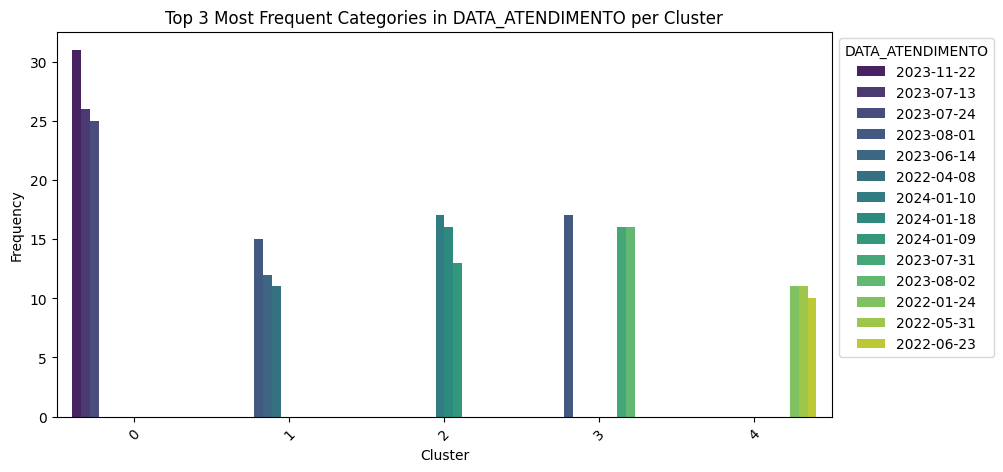

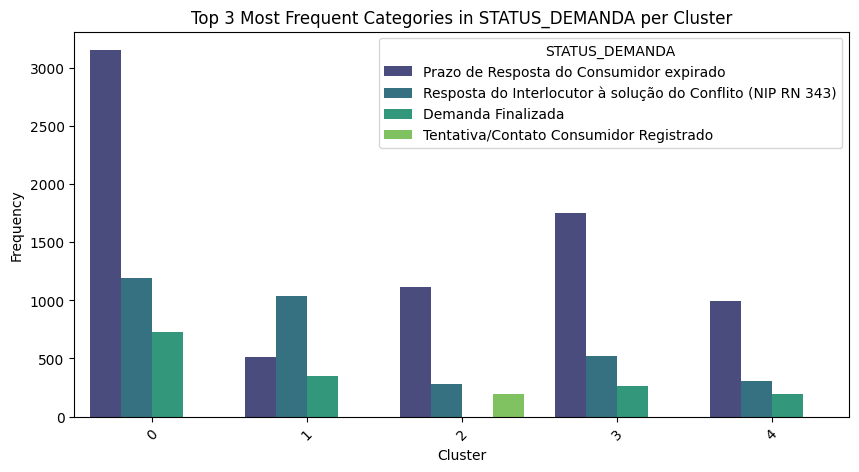

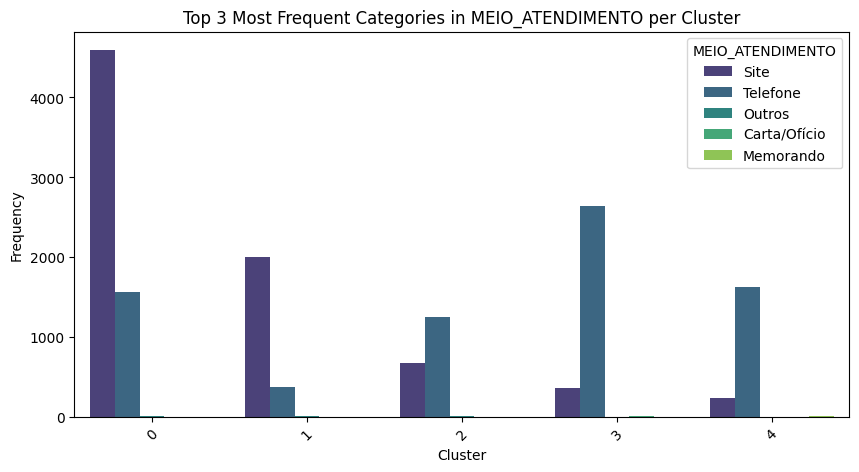

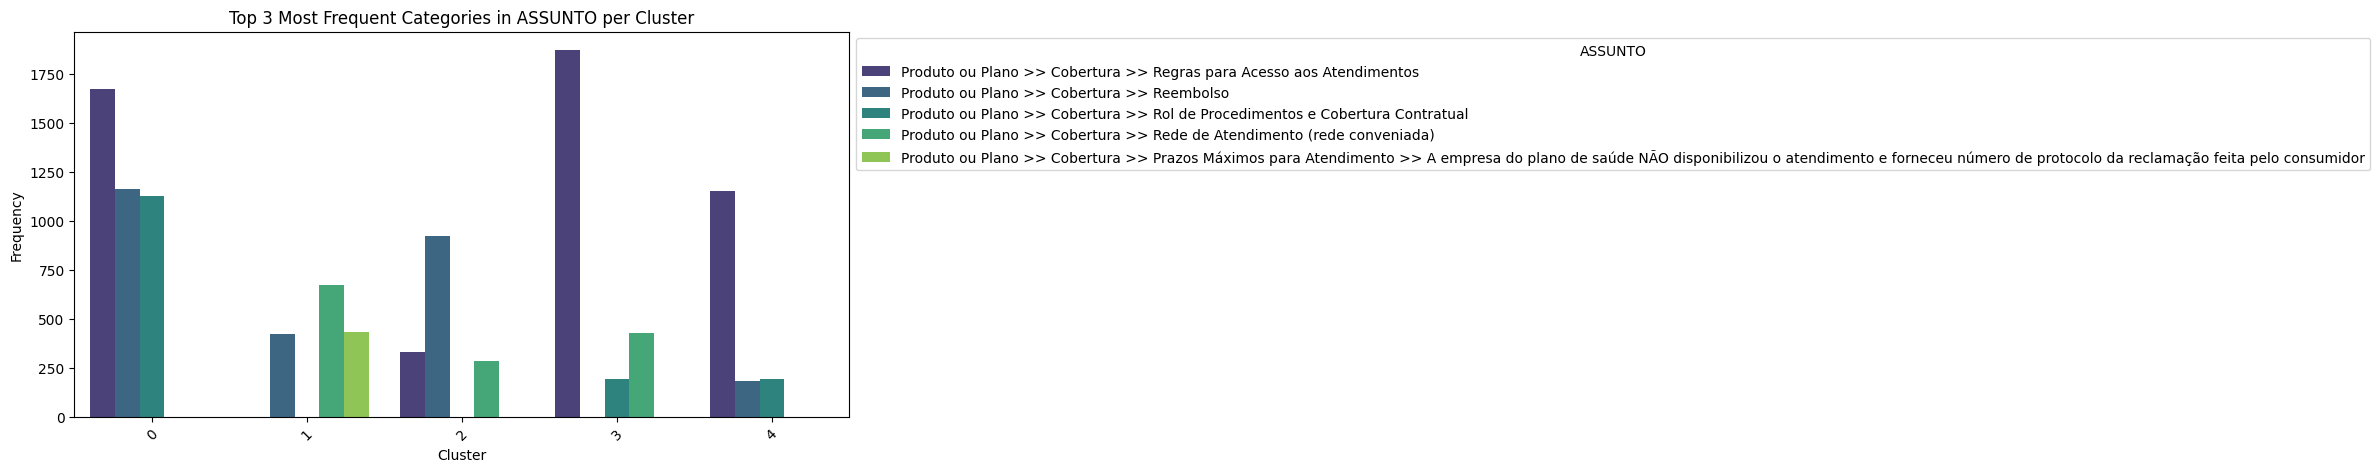

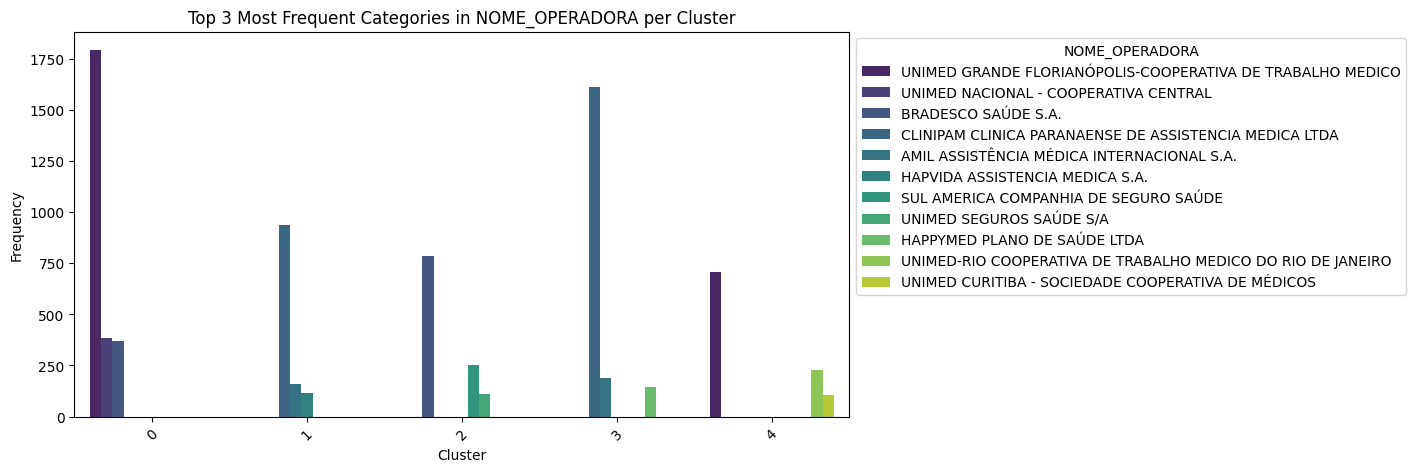

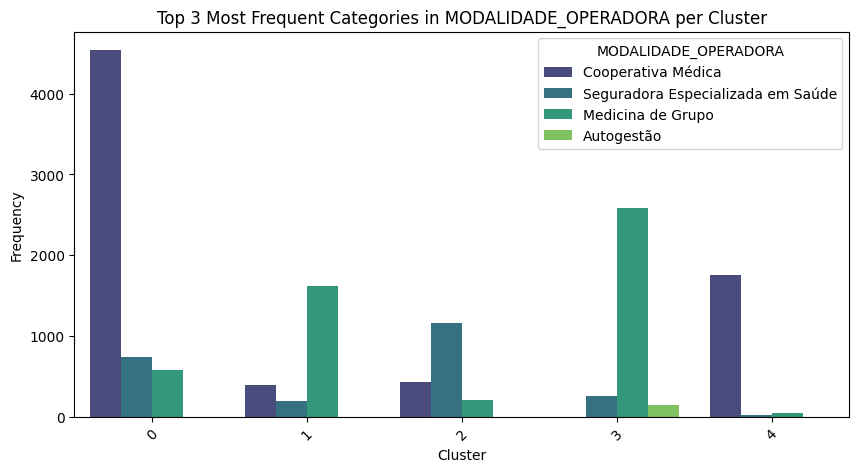

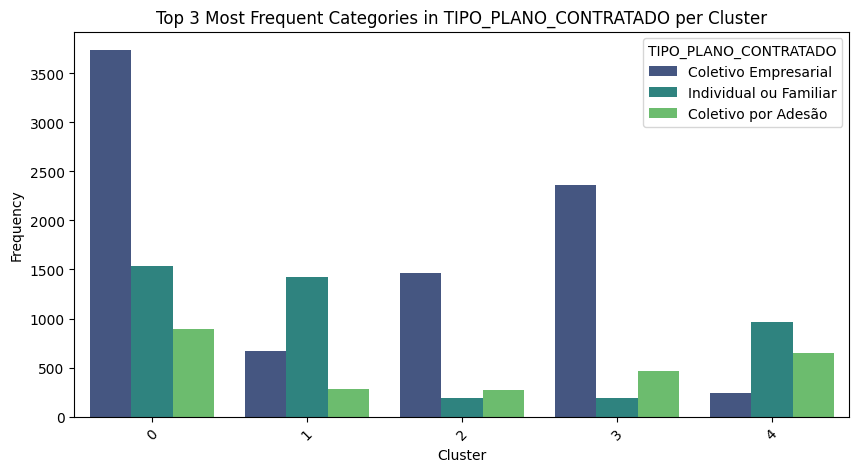

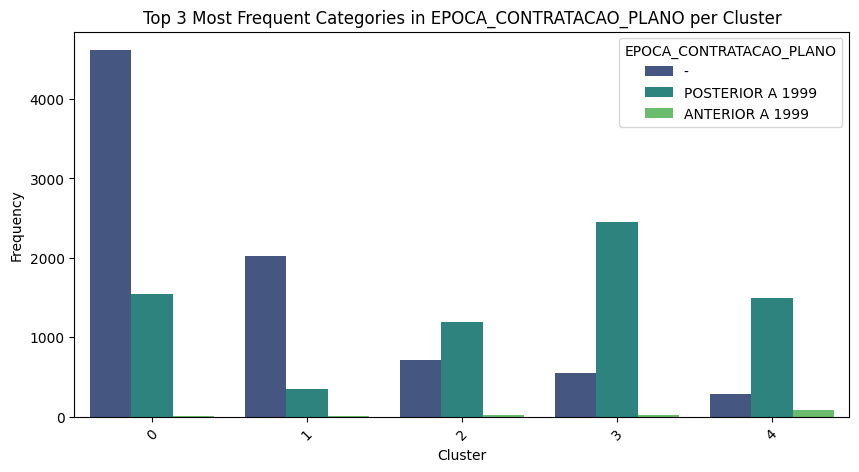

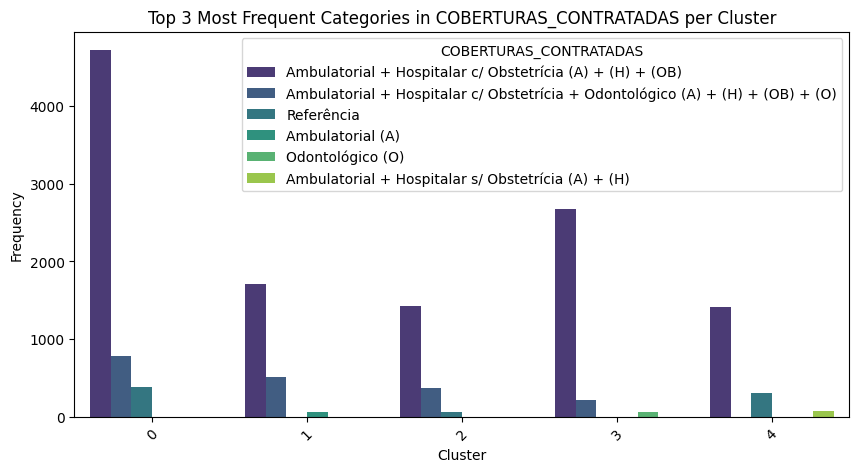

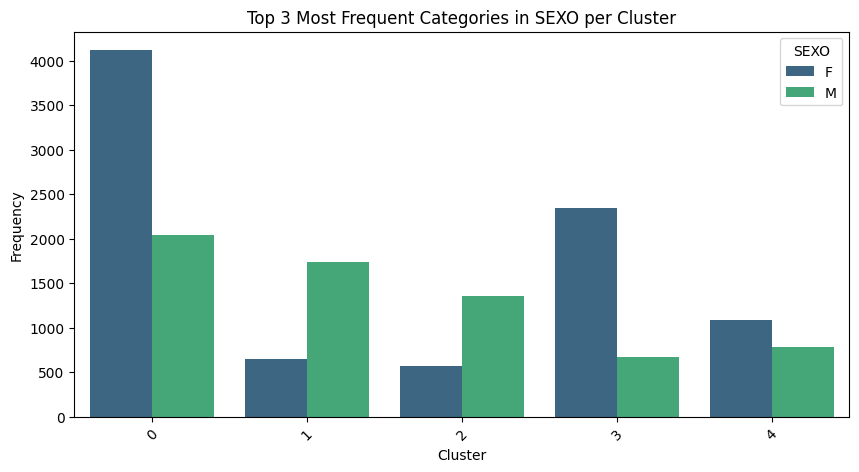

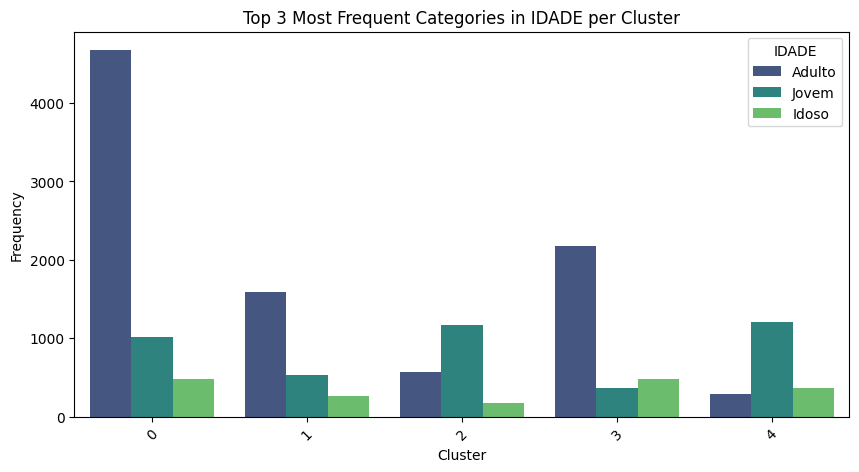

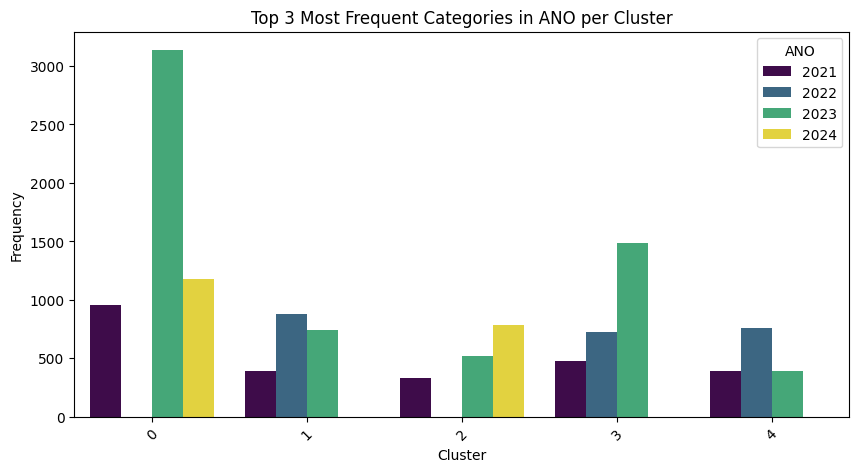

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to analyze (excluding the 'CLUSTER' column) to check if clusters are defined
features = df.columns.tolist()
features.remove("CLUSTER")

# Loop through each feature and generate a bar chart
for feature in features:
    plt.figure(figsize=(10, 5))

    # Count category occurrences within each cluster
    top_categories = df.groupby("CLUSTER")[feature].value_counts().reset_index(name="count")

    # Select the top 3 most frequent categories for each cluster
    top3 = top_categories.groupby("CLUSTER").head(3)

    # Plot the grouped bar chart
    sns.barplot(x="CLUSTER", y="count", hue=feature, data=top3, palette="viridis")

    plt.title(f"Top 3 Most Frequent Categories in {feature} per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Frequency")
    plt.legend(title=feature, bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.show()
